<a href="https://colab.research.google.com/github/ndeleonardis/DataSetNoeliaDeLeonardis/blob/main/entregable_datasciense_3_noelia_de_leonardis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción


Para este trabajo se usa un **dataset productivo** al cual s**e le aplicó anonimización de datos** (los 8 digitos consecutivos al cuil y cuit se generaron aleatoriamente). Este DataSet contiene información de operaciones de rescate de **Fondos Comunes de Inversión de un Banco de Argentina**.

El trabajo va estar dividido en 2 partes primordiales que serán la solicitudes de suscripción y rescate cursadas en el **año 2023.**

Antes que nada vamos a definir que es un **Fondo Común de Inversión**, fondo común de inversión es un vehículo financiero que agrupa el capital de múltiples inversores para invertir en una cartera diversificada de activos, como acciones, bonos o bienes raíces. La gestión de estas inversiones es realizada por profesionales especializados, y los rendimientos se distribuyen entre los inversores en función de su participación en el fondo.

A modo general, se trabajo en la obtención de información, la misma esta parcializada ya que solo se tiene acceso a la base de fondos y no a otras integraciones.

Para dar un pantallazo, para que un cliente pueda operar en Fondos Champaquí, debe abrir una cuenta de inversión, la misma queda registrada en otra base de datos a la cual no tenemos acceso, pero los datos del cliente se preplican de forma parcial.


Cada cliente para poder operar como indicamos tiene que poseer una cuenta de inversión y realizar el perfil de inversor, que dice que adversión al riesgo puede tener la persona, conservadora, moderada, o agresiva. Basicamente es que nivel de riesgo esta dispuesta a tomar para obtener ganancias.


# Hipótesis que trataremos de responder

**Patrones de Suscripción y Rescate según el Perfil de Riesgo**

    **Hipótesis:** Los inversores con un perfil de riesgo más alto realizan más solicitudes de suscripción y rescates en comparación con los inversores con perfiles más conservadores.

**Los hombres invierten más que las mujeres**

    **Hipótesis:** Es verdad que los hombres invierten más que las mujeres?.

**En que temporada se concentran más suscripciones y rescates?**

    **Hipótesis:** Hay patrones estacionales en las solicitudes de suscripción y rescates, como un aumento durante ciertos meses del año.


In [ ]:
#Importación de Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Cargamaos el archivo usamos URL cruda del archivo CSV que esta en nuestro GitHub
url = 'https://raw.githubusercontent.com/ndeleonardis/DataSetNoeliaDeLeonardis/main/dataset_suscripciones_2023.csv'


# Cargar el archivo CSV en un DataFrame de Pandas
try:
    df = pd.read_csv(url)
    print("El archivo CSV se ha cargado exitosamente.")
except Exception as e:
    print("Se produjo un error al cargar el archivo CSV:", e)

<ipython-input-3-6f358b6705e5>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


El archivo CSV se ha cargado exitosamente.


In [ ]:
df.head ()

,CodFondo,NombreFondo,CodAgColocador,CodSucursal,CodSolSusc,CodTpValorCp,CodCanalVta,CodOficialCta,CodCondicionIngEgr,CodMoneda,...,CodTpPerfilRiesgoCpt,CodPais,CodProvincia,Localidad,AlturaCalle,Piso,Departamento,CodigoPostal,CodTpInversor,Descripcion
0,1,Ahorro Pesos,1,1,119207,1,NaN,1,1,1,...,CON,1,1.0,CABA,1997,3,12,1000,1.0,Personas Humanas Argentina Mayores de Edad
1,1,Ahorro Pesos,1,1,119386,1,NaN,1,1,1,...,CON,1,NaN,CABA,1551,6,601,1000,1.0,Personas Humanas Argentina Mayores de Edad
2,1,Ahorro Pesos,1,1,119532,4,NaN,1,10,1,...,AGR,1,1.0,CABA,341,5,A,1000,2.0,Inversores Corporativos
3,1,Ahorro Pesos,1,1,124841,1,NaN,1,1,1,...,MOD,1,1.0,CABA,4026,NaN,NaN,1000,1.0,Personas Humanas Argentina Mayores de Edad
4,1,Ahorro Pesos,1,1,127297,1,NaN,1,1,1,...,CON,1,1.0,CABA,1997,3,12,1000,1.0,Personas Humanas Argentina Mayores de Edad


### Data Wrangling y Data Wrangling y Exploratory Data Analyst

In [ ]:
#Exploramos el dataframe con el comando info que nos da información del tipo de datos y nro de entradas y valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224518 entries, 0 to 224517
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CodFondo              224518 non-null  int64  
 1   NombreFondo           224518 non-null  object 
 2   CodAgColocador        224518 non-null  int64  
 3   CodSucursal           224518 non-null  int64  
 4   CodSolSusc            224518 non-null  int64  
 5   CodTpValorCp          224518 non-null  int64  
 6   CodCanalVta           1404 non-null    float64
 7   CodOficialCta         224518 non-null  int64  
 8   CodCondicionIngEgr    224518 non-null  int64  
 9   CodMoneda             224518 non-null  int64  
 10  CodCuotapartista      224518 non-null  int64  
 11  NumSolicitud          224518 non-null  int64  
 12  Importe               224518 non-null  float64
 13  FechaConcertacion     224518 non-null  object 
 14  FechaAcreditacion     224518 non-null  object 
 15  

In [ ]:
# Contamos el número de valores nullosCounts the number of null values
na_values = df.isna().sum()

# Prints 0, significa que no hay valores nullos.
print(na_values)

CodFondo                     0
NombreFondo                  0
CodAgColocador               0
CodSucursal                  0
CodSolSusc                   0
CodTpValorCp                 0
CodCanalVta             223114
CodOficialCta                0
CodCondicionIngEgr           0
CodMoneda                    0
CodCuotapartista             0
NumSolicitud                 0
Importe                      0
FechaConcertacion            0
FechaAcreditacion            0
Observaciones           224516
FactorConversion             0
EstaAnulado                  0
CodAuditoriaRef              0
EsAntesDeHorario             0
EsArt5Bis                    0
Hora                         0
CodUsuarioIngreso            0
CodTpOrigenSol               0
CodTpEstadoSol               0
ImporteImpTransf        224518
NumCuotapartista             0
FechaIngreso             12483
EsPersonaFisica              0
Perfil                  224518
PerfilRiesgoFechaVto    224518
CodTpPerfilRiesgoCpt      2359
CodPais 

Luego de ejecutar este comando vemos que:
**Tenemos un total de 224.518 registros con 41 columnas** (RangeIndex: 224518 entries, 0 to 224517)
Con la salida de este comando vemos las siguientes observaciones:

* **Campos Fechas (FechaConcertacion / FechaAcreditacion / FechaIngreso)** no tienen el formato fecha
* **CodCanalVta** solo tiene 1404 valores No nulls
* **Observaciones** que nos sera de utilidad tiene  222.413 non-null es decir que nos faltan 2.105 con datos, ya vamos a filtrar por esas columnas a fin de determinar que realizaremos.
También vemos que las fechas no estan en formato de fecha.
* Datos con valores todos nullos (Perfil/PerfilRiesgoFechaVto  )

Hice un análisis de este campo y para no ensuciar la notebook no pongo el print
df_filtered = df[df['CodCanalVta'].notna()] basicamente traia valores 1 y 2 que se debe haber comenzado a usar y luego se depreco.

Llegue a la conclusión que los campos: "PerfilRiesgoFechaVto /  CodCanalVta /  ImporteImpTransf" además de tener muchos nulos o todos nullos no se utilizarán para nuestro análisis. por lo cual en el siguiente paso vamos a eliminarnos del dataframe.


In [ ]:
#df.drop('PerfilRiesgoFechaVto', axis=1, inplace=True)
#df.drop('CodCanalVta', axis=1, inplace=True)
#df.drop(' ImporteImpTransf', axis=1, inplace=True)

#me dio error al tratar de elminarlos por lo que los dejo

In [ ]:
df['FechaConcertacion'] = pd.to_datetime(df['FechaConcertacion'])
df['FechaAcreditacion'] = pd.to_datetime(df['FechaAcreditacion'])
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'])

print(df.dtypes)  # Verificar el tipo de dato de la columna


CodFondo                         int64
NombreFondo                     object
CodAgColocador                   int64
CodSucursal                      int64
CodSolSusc                       int64
CodTpValorCp                     int64
CodCanalVta                    float64
CodOficialCta                    int64
CodCondicionIngEgr               int64
CodMoneda                        int64
CodCuotapartista                 int64
NumSolicitud                     int64
Importe                        float64
FechaConcertacion       datetime64[ns]
FechaAcreditacion       datetime64[ns]
Observaciones                   object
FactorConversion               float64
EstaAnulado                      int64
CodAuditoriaRef                  int64
EsAntesDeHorario                 int64
EsArt5Bis                        int64
Hora                            object
CodUsuarioIngreso                int64
CodTpOrigenSol                  object
CodTpEstadoSol                  object
ImporteImpTransf         

#### Enriquecimiento de Data Frame con Columna Sexo

Analizamos el campo observaciones, que es de interes porque es una forma que el sistema mapeo con que CUIT o CUIL se realizó la transacción.
 Vemos que el mismo tiene un formato "Nro|AR1B-AR1A" donde AR1B signnifica CUIL y esta en general asociado a personas físicas, mientras que AR1A "27324839386|AR1B"
 Tenemos un campo "EsPersonaFisica" que nos indica si las persona es física (-1) o jurídica  (0)
 Como los clientes son mayores a 18 años, hasta esa fecha (año 2021) los CUIL se asignaban por afip 20 para masculino y 27 para femenino.
Entonces trataremos de asignar sexo por ahi.

In [ ]:
# 1. Filtrar los registros donde 'EsPersonaFisica' es 1
df_personas_fisicas = df[df['EsPersonaFisica'] == -1]
print(f"Cantidad de registros de personas físicas: {df_personas_fisicas.shape[0]}")
print()

# 2. Crear una nueva columna 'Sexo' e inicializarla con NaN
df['Sexo'] = np.NaN
print("Se ha creado la columna 'Sexo' y se ha inicializado con valor -100 (no asignado).")
print()

# 3. Asignar valores a la columna 'Sexo' basados en el campo 'Observaciones'
# Solo modificar la columna 'Sexo' en los registros filtrados
df.loc[df['EsPersonaFisica'] == -1, 'Sexo'] = df['Observaciones'].apply(
    lambda x: 1 if str(x).startswith('20') else (0 if str(x).startswith('27') else -100)
)
print(f"Se han asignado valores a la columna 'Sexo' basada en el campo 'Observaciones'.")
print()

# 4. Verificar y contar los valores en la columna 'Sexo'
sexo_counts = df['Sexo'].value_counts(dropna=False)
print("Cantidad de valores en la columna 'Sexo':")
print(sexo_counts)
print()

# 5. Verificar la actualización del DataFrame
print("Información del DataFrame después de la actualización:")
print(df.info())
print()


Cantidad de registros de personas físicas: 171938

Se ha creado la columna 'Sexo' y se ha inicializado con valor -100 (no asignado).

Se han asignado valores a la columna 'Sexo' basada en el campo 'Observaciones'.

Cantidad de valores en la columna 'Sexo':
Sexo
-100.0    171936
 NaN       52580
 0.0           2
Name: count, dtype: int64

Información del DataFrame después de la actualización:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224518 entries, 0 to 224517
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CodFondo              224518 non-null  int64         
 1   NombreFondo           224518 non-null  object        
 2   CodAgColocador        224518 non-null  int64         
 3   CodSucursal           224518 non-null  int64         
 4   CodSolSusc            224518 non-null  int64         
 5   CodTpValorCp          224518 non-null  int64         
 6   CodCanalVta      

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224518 entries, 0 to 224517
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CodFondo              224518 non-null  int64         
 1   NombreFondo           224518 non-null  object        
 2   CodAgColocador        224518 non-null  int64         
 3   CodSucursal           224518 non-null  int64         
 4   CodSolSusc            224518 non-null  int64         
 5   CodTpValorCp          224518 non-null  int64         
 6   CodCanalVta           1404 non-null    float64       
 7   CodOficialCta         224518 non-null  int64         
 8   CodCondicionIngEgr    224518 non-null  int64         
 9   CodMoneda             224518 non-null  int64         
 10  CodCuotapartista      224518 non-null  int64         
 11  NumSolicitud          224518 non-null  int64         
 12  Importe               224518 non-null  float64       
 13 

In [ ]:
# Utilizamos el comando describe () para ver valores estadisticos como la media, valor mínimo, valor máximo pero solo de las columnas de interes. Al comando le aplique un formato de estilo ya que
#lo mostraba en notacion exponencial/cientifica y me dificultaba leerlo.
#descripcion = df.describe().style.format("{:.2f}")
#display(descripcion)

columns_of_interest = ['Importe', 'FechaConcertacion', 'FechaAcreditacion', 'Hora', 'Descripcion', 'EsPersonaFisica']
df_subset = df[columns_of_interest]

# Aplicar describe() solo a las columnas seleccionadas
df_describe = df_subset.describe(include='all')

# Función personalizada para formatear como moneda
def currency_format(x):
    if pd.isna(x):
        return ''
    return "${:,.2f}".format(x)

# Aplicar formato personalizado solo a la columna 'Importe'
descripcion = df_subset.describe(include='all').style.format({
    'Importe': currency_format,
    # Aplica formato general a las columnas numéricas (opcional)
    #**{col: "{:.2f}" for col in df_subset.select_dtypes(include=['float', 'int']).columns if col != 'Importe'}
})

# Mostrar la descripción formateada
display(descripcion)

,Importe,FechaConcertacion,FechaAcreditacion,Hora,Descripcion,EsPersonaFisica
count,"$224,518.00",224518,224518,224518,224444,224518.000000
unique,,nan,nan,92095,9,nan
top,,nan,nan,2023-12-22 15:55:00,Personas Humanas Argentina Mayores de Edad,nan
freq,,nan,nan,16,171864,nan
mean,"$5,412,084.77",2023-08-05 03:17:47.214210048,2023-08-05 03:17:47.214210048,nan,nan,-0.765809
min,$0.00,2023-01-02 00:00:00,2023-01-02 00:00:00,nan,nan,-1.000000
25%,"$50,000.00",2023-05-23 00:00:00,2023-05-23 00:00:00,nan,nan,-1.000000
50%,"$200,000.00",2023-08-18 00:00:00,2023-08-18 00:00:00,nan,nan,-1.000000
75%,"$960,000.00",2023-10-30 00:00:00,2023-10-30 00:00:00,nan,nan,-1.000000
max,"$50,000,000,000.00",2023-12-29 00:00:00,2023-12-29 00:00:00,nan,nan,0.000000


<ipython-input-19-359d3e89afce>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PerfilRiesgo', y='NumeroSuscripciones', data=suscripciones_per_perfil, palette=palette)


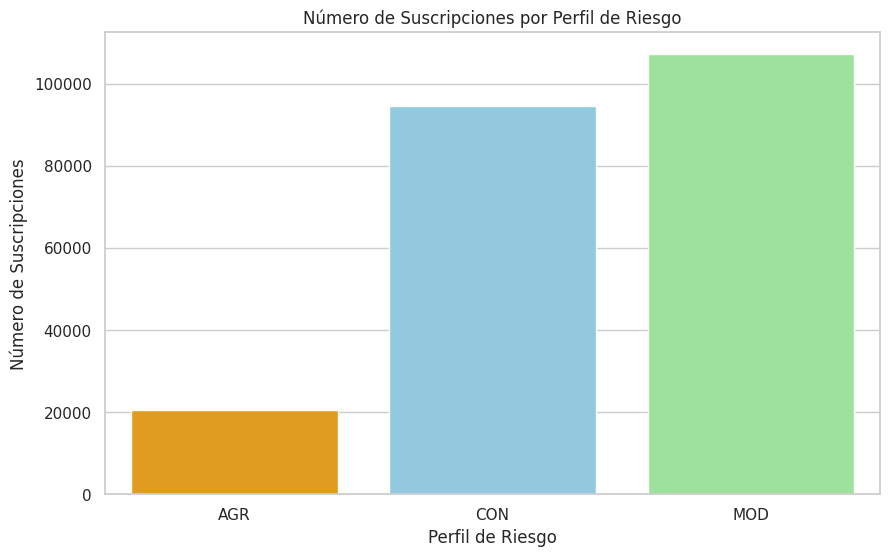

In [ ]:
# Contar el número de suscripciones por perfil de riesgo
suscripciones_per_perfil = df['CodTpPerfilRiesgoCpt'].value_counts().reset_index()
suscripciones_per_perfil.columns = ['PerfilRiesgo', 'NumeroSuscripciones']

# Definir una paleta de colores personalizada
palette = {
    'CON': 'skyblue',
    'AGR': 'orange',
    'MOD': 'lightgreen'
}

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
sns.barplot(x='PerfilRiesgo', y='NumeroSuscripciones', data=suscripciones_per_perfil, palette=palette)
plt.title('Número de Suscripciones por Perfil de Riesgo')
plt.xlabel('Perfil de Riesgo')
plt.ylabel('Número de Suscripciones')
plt.show()





<ipython-input-27-2537a23ea953>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PerfilRiesgo', y='TotalInvertido', data=inversion_por_perfil, palette=palette)


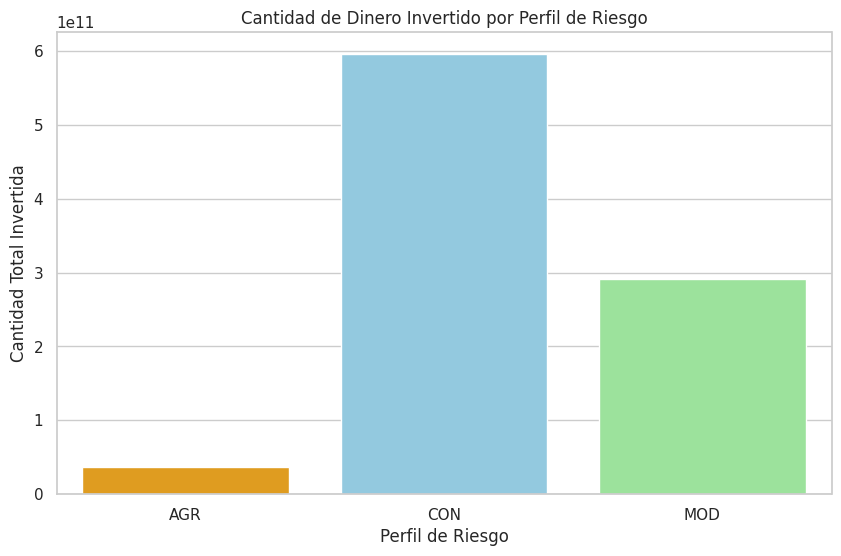

In [ ]:

# Agrupar por perfil de riesgo y sumar la cantidad de dinero invertido

inversion_por_perfil = df.groupby('CodTpPerfilRiesgoCpt', observed=False)['Importe'].sum().reset_index()

inversion_por_perfil.columns = ['PerfilRiesgo', 'TotalInvertido']

# Definir una paleta de colores personalizada
palette = {
    'CON': 'skyblue',
    'AGR': 'orange',
    'MOD': 'lightgreen'
}

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
sns.barplot(x='PerfilRiesgo', y='TotalInvertido', data=inversion_por_perfil, palette=palette)
plt.title('Cantidad de Dinero Invertido por Perfil de Riesgo')
plt.xlabel('Perfil de Riesgo')
plt.ylabel('Cantidad Total Invertida')
plt.show()






Nuestra hipótesis a dilucidar es: **Hipótesis: Los inversores con un perfil de riesgo más alto realizan más solicitudes de suscripción y rescates en comparación con los inversores con perfiles más conservadores. es NULA** por el gráfico vemos que el mayor número de suscripciones se realizan por perfil de riesgo *moderado*. También podemos observar que los clientes con **perfil conservador** son los que mayores montos invierten, y por el contrario podemos observar que los que menos plata y menos suscripciones hacen son los perfiles agresivos.

**Como insight para el negocio**, podemos revisar la cantidad de fondos que existe por perfil de riesgo, porque podemos llegar  inferir que una razón de esa baja es porque el negocio no ofrece fondos para ese tipo de perfil de clientes.

También vamos a revisar la cantidad de clientes por perfil de riesgo y la cantidad de fondos disponibles para cada tipo de perfil.



  Perfil  CantidadFondos
0    MOD               6
1    CON               3
2    AGR               1


<ipython-input-34-378e52d23282>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Perfil', y='CantidadFondos', data=fondos_por_perfil, palette=palette)


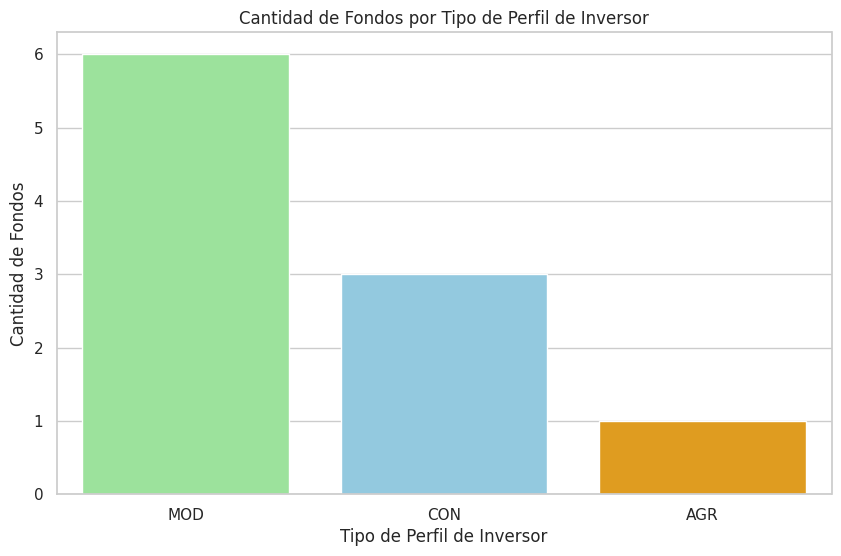

In [ ]:
# Crear un DataFrame a partir de la tabla proporcionada
data = {
    'Fondo': [
        'Inmediato', 'Inmediato Plus', 'Ahorro Pesos',
        'Abierto Pymes', 'Cobertura', 'Estrategico',
        'Renta Futura', 'Renta Dólar', 'Renta Variable',
        'Renta Pesos'
    ],
    'Perfil': [
        'CON', 'CON', 'CON',
        'MOD', 'MOD', 'MOD',
        'MOD', 'MOD', 'AGR',
        'MOD'
    ]
}

df_fondos = pd.DataFrame(data)

# Contar la cantidad de fondos por tipo de perfil
fondos_por_perfil = df_fondos['Perfil'].value_counts().reset_index()
fondos_por_perfil.columns = ['Perfil', 'CantidadFondos']

# Verificar los datos
print(fondos_por_perfil)

# Definir una paleta de colores personalizada
palette = {
    'CON': 'skyblue',
    'AGR': 'orange',
    'MOD': 'lightgreen'
}

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Perfil', y='CantidadFondos', data=fondos_por_perfil, palette=palette)

# Configurar el título y las etiquetas
plt.title('Cantidad de Fondos por Tipo de Perfil de Inversor')
plt.xlabel('Tipo de Perfil de Inversor')
plt.ylabel('Cantidad de Fondos')
plt.show()


  PerfilRiesgo  CantidadClientes
0          MOD            107134
1          CON             94505
2          AGR             20520


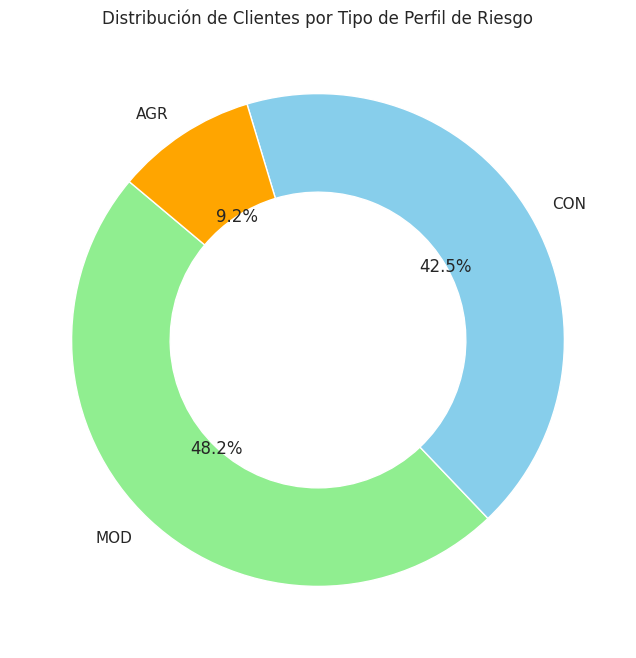

In [16]:


# Agrupar por CodTpPerfilRiesgoCpt y contar la cantidad de registros
clientes_por_perfil = df['CodTpPerfilRiesgoCpt'].value_counts().reset_index()
clientes_por_perfil.columns = ['PerfilRiesgo', 'CantidadClientes']

# Verificar los datos
print(clientes_por_perfil)

# Definir una paleta de colores personalizada
palette = {
    'CON': 'skyblue',
    'AGR': 'orange',
    'MOD': 'lightgreen'
}

# Configurar el estilo del gráfico
plt.figure(figsize=(8, 8))

# Crear el gráfico de torta
plt.pie(
    clientes_por_perfil['CantidadClientes'],
    labels=clientes_por_perfil['PerfilRiesgo'],
    colors=[palette.get(x, 'grey') for x in clientes_por_perfil['PerfilRiesgo']],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)
)

# Configurar el título
plt.title('Distribución de Clientes por Tipo de Perfil de Riesgo')

# Mostrar el gráfico
plt.show()


# Los hombres invierten más que las mujeres